<center><h2> Feature Selection in Machine Learning Models </h2></center>
<center><h3>Sukrit Ajmani</h3></center>

### Introduction

As Technology is making the world smaller, the data associated is becoming bigger and bigger. Advanced data collection techniques have enabled us to collect ordered and unordered data much more quickly. Advancement in Machine learning techniques have enabled us to make sense of this data by analyze it and predicting from it.

But this increase in data also means increase in number of features or predictors associated with any machine learning algorithm. Not all the variables have the same predictive power in a model. While some features are useful in predictions and estimation for a model, the other variables have no or little power in the model and just contribute to adding noise to the model. Thus, feature selection is an important step for tuning any model.

Feature selection helps us decide which variables to keep in our model and which variables to throw out. We are going to look at different techniques to approach feature selection in any model. These methods employ different comparision paramteres to predict the most important variable - some compare statistical parameters like chi-squared while other look at average mean squared error and try to minimise that. We will take a look a practical approach to look at theses methods in the following sections.

### Libraries

We will not need any libraries which are beyond our usual suspects - NumPy , scikitlearn and  Pandas. We will go ahead and load those in our runtime.

In [1]:
import numpy as np
import pandas as pd

### Importing Data

We are going to use a news dataset which contains data about a newspaper and its content. The data is majorly numerical in nature, thus giving us the uniformity to run our feature selection methods on. The data set was curated by Prof. Alexandra Chouldechova of Carnegie Mellon University. This dataset works perfectly because it has large number of variables which are used in prediction (over 100) and a few of them have been introduced for purpose of distortion, and hence should not be included in any of the models.

In [2]:
url = 'http://www.andrew.cmu.edu/user/achoulde/95791/data/online_news.csv'
dataframe = pd.read_csv(url)

In [3]:
news_data = dataframe.loc[np.random.choice(dataframe.index, 200, replace=False)]

We have loaded the data in our dataframe. To reduce the dataframe size, we have reduced the sample size to 200 random rows to make the tutorial run faster. These methods should perform the same way irrespective the size of your dataset. We can use the head command to see some of the data in our database.

In [4]:
news_data.head()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
1215,710,8,1236,0.447627,1.0,0.634747,31,10,9,0,...,0.033333,0.8,-0.243873,-0.700000,-0.100000,0.000000,0.000000,0.500000,0.000000,30200
7728,587,13,823,0.452206,1.0,0.660754,8,1,1,1,...,0.100000,0.5,-0.321102,-0.500000,-0.050000,0.313636,0.034091,0.186364,0.034091,138
4637,648,8,215,0.658537,1.0,0.722973,9,1,1,0,...,0.033333,0.5,-0.175000,-0.300000,-0.050000,0.000000,0.000000,0.500000,0.000000,1700
5569,630,9,719,0.544429,1.0,0.716854,10,0,1,0,...,0.033333,1.0,-0.344277,-1.000000,-0.071429,0.000000,0.000000,0.500000,0.000000,823
2474,688,11,384,0.542553,1.0,0.693694,10,5,1,0,...,0.200000,1.0,-0.110417,-0.166667,-0.050000,0.000000,0.000000,0.500000,0.000000,775


We are going to seperate our prediction variable and our predictors. We are putting our predictors in newsX and our prediction variables, which is "shares" in newsY.

In [5]:
news_array = news_data.values
newsX = news_array[:,0:53]
newsY = news_array[:,54]
np.set_printoptions(precision=4)

We are gonna run basic statistical methods to get a basic approximation of all the different predictors in our dataset.

In [6]:
print(news_data.describe())

        timedelta  n_tokens_title  n_tokens_content  n_unique_tokens  \
count  200.000000      200.000000        200.000000       200.000000   
mean   368.850000       10.305000        510.765000         0.547862   
std    227.278651        2.273283        388.022379         0.131326   
min     10.000000        4.000000          0.000000         0.000000   
25%    159.500000        9.000000        223.250000         0.481488   
50%    391.500000       10.000000        379.500000         0.550242   
75%    589.500000       12.000000        716.000000         0.621792   
max    725.000000       16.000000       2173.000000         0.911111   

       n_non_stop_words  n_non_stop_unique_tokens   num_hrefs  num_self_hrefs  \
count        200.000000                200.000000  200.000000      200.000000   
mean           0.980000                  0.687173   11.095000        3.055000   
std            0.140351                  0.140342   13.036322        2.848252   
min            0.000000    

### Feature Selection Methods

We will see different methods of feature selections in the following section. We begin our discussion with univariate method, which is preemptive selection of variables based on statistical parameters. We move on to discussing Recursive methods which are dynamic best subset selection models. We also discuss Lasso or penalized regression using Cross Validation and information criterion methods, which eliminate variable by virtue of penalty variable. We finish our discussion by seeing a classification tree method.

#### 1) Univariate Selection

We start our discussion with a method which selects variable based on univariate statistical testing. The choose one of the statistical methods to select the top K variables which contribute the most towards that statistic paramter.

The scikit-learn library provides the SelectKBest class that can use different statistical paramters like chi squared, f_regression etc. to select the best variables.

In [7]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

uniVar = SelectKBest(score_func=f_regression, k=5)
news_fit = uniVar.fit(newsX, newsY)


print(news_fit.scores_)

print(news_fit.scores_.argsort()[-5:][::-1])

selectedFeatures = news_fit.transform(newsX)
print(selectedFeatures[0:5,:])

[  4.0665e-01   1.2926e-01   7.0679e+00   1.8596e-01   6.5706e-02
   2.1986e-01   2.8923e+01   1.9226e+00   4.6446e+00   2.7713e-01
   2.8034e-01   1.0792e+00   4.0853e+00   1.5919e-01   4.6920e-01
   2.0756e-01   4.0303e+00   5.3820e-01   8.6496e-03   2.2761e-02
   1.1887e-01   1.5662e+00   4.9665e-01   7.6248e+00   7.2175e-01
   5.2280e+00   3.4434e-01   4.7107e+00   2.7882e+00   1.6063e+00
   9.0891e-03   8.4375e-03   5.6896e-01   1.0596e+00   1.9566e+00
   4.5079e+00   2.6980e+00   4.0655e-01   1.3125e+00   9.1136e-02
   5.0414e-01   4.9241e-01   2.8173e-02   1.7100e-01   3.5878e-03
   4.3689e-02   1.3559e-01   9.5006e-01   3.2335e+00   1.0477e-01
   1.7887e+00   3.9057e+00   7.2064e-01]
[ 6 23  2 25 27]
[[  1.2360e+03   3.1000e+01   2.5531e+03   3.3124e+03   2.3700e+04]
 [  8.2300e+02   8.0000e+00   0.0000e+00   2.1517e+03   1.2000e+03]
 [  2.1500e+02   9.0000e+00   2.1250e+03   3.1303e+03   0.0000e+00]
 [  7.1900e+02   1.0000e+01   0.0000e+00   3.2041e+03   0.0000e+00]
 [  3.8400

<b>How it works:</b> The SelectKBest method chooses a parameter and the K defines the number of features you want to select. We fit the the model uniVar on the newsX and newsY arrays to compute the values of the f_regression parameter for all 54 variables.
We then select the top 5 indices , which are the variables at 49,25,23,39 and 38.
We can calculate the selected features and see the five values of their corresponding features as displayed above.

The functions that could be used are:

<b>For regression:</b> f_regression, mutual_info_regression

<b>For classification:</b> chi2, f_classif, mutual_info_classif

The methods based on F-test estimate the degree of linear dependency between two random variables. 

Also, mutual information methods being nonparametric require more samples for accurate estimation.

<b>Note:</b> Some other methods provides by scikit-learn to do univariate analysis are - <u>selectPercentile</u>, which gives top n percentile of high features. <u>SelectFpr</u>, which selects features based on false positive rates and <u>GenericUnivariateSelect</u> allows to perform univariate feature selection with a configurable strategy. This allows to select the best univariate selection strategy with hyper-parameter search estimator.

#### 2) Recursive Feature Elimination

Recursive feature elimination or also known as backward subset selection is a method of starting with the full model and then removing features and compare different models. Unlike Univariate selection where the variables are decided at first step , RFE chooses the next best model at every step by removing one variable at a time at each step.

It uses model accuracy to predict the set of attributes which contribute the most to any given model. In a RFE model the user can specify the number of variables the user wants RFE to stop. For optimal solutions, we can also use RFE in conjunction with cross validation to automatically tune the model to right number of features.

number of features : 2
[39 34 43 27  1 13 30 29 36 37 15 35 16 20 40 33 21 38 45 42 49 52 51 41 46
 44 48 50 47 18 32 28 19 31 17 12 23 24  8  9  3  7  1  2 25 10 26  4  6  5
 14 11 22]


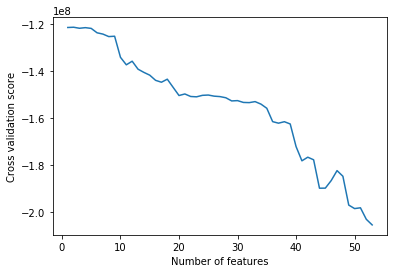

In [8]:
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression

# Create the RFE object and compute a cross-validated score.
lr = LinearRegression()
# The "accuracy" scoring is proportional to the number of correct
# classifications
rfec = RFECV(estimator=lr, step=1, cv=5,scoring = 'neg_mean_squared_error')
rfec.fit(newsX, newsY)

print("number of features : %d" % rfec.n_features_)
print(rfec.ranking_)
# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features")
plt.ylabel("Cross validation score")
plt.plot(range(1, len(rfec.grid_scores_) + 1), rfec.grid_scores_)
plt.show()

<b>How it works:</b> Recursive Feature Elimination works by taking into account an external estimator or an external model. In our case we have taken our external estimator to be Linear Regression. You may take it to be any other mdodel - SVC , SCR , Logistic Regression etc. Parameter stp defines the number of variables to be removed per iteration and cv defines the cross validation folds to be considered. We can define the evaluation paramter in scoring attribute. We have used negative mean squared error in our case , which is maximum at three variables. You can also accuracy,FPR,FNR for classification and r-squared for prediction.

We can see that RFECV gives ranking to each of the feature in the model , and four features are ranked number one. Thus those are the variables which add the maximum value to our model. 

The estimator is trained initially on set of features and the importance of each feature is obtained either through a coef_ attribute. The least important features are pruned from current set of features.

#### 3) Lasso & Information Criterion Models

Lasso or Regularised Regression model constraint or regularize the coefficient estimates, “shrinking” them towards zero. This is also referred to as Shrinkage Methods or Regularized Regression methods. Its a model that estimates sparse coeffecients . So, in our example we have 54 variable, lasso will estimate numeric values for lets say 7 of them and the rest will have 0 coeffecients.

So just like a sparse matrix where we eliminate 0's and form a matrix, our regression equation will be leaner and have much fewer variables. There is a penalty parameter, which helps us decide what kind of penalty should be applied to our equation. Higher the penalty, more features are tending to zero.

It is useful in some contexts due to its tendency to prefer solutions with fewer parameter values, effectively reducing the number of variables upon which the given solution is dependent.

The Lasso method estimates coefficients βλ by minimizing the L1 penalized RSS

<img src="equation.png"/>

The quantity ∑|βj| is typically denoted ∥β∥1, which is called the L1-norm, thus giving lasso the name L1-regularised regression. The tuning parameter λ allows us to control the overall complexity of the model. λ = 0 takes us back to least squares equation as it reduces the penalty paramter on everything and a large λ starts increasing the penalty thus making everything close to 0.


In [9]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
print(newsX.shape)
lr = Lasso(alpha=30).fit(newsX, newsY)
model = SelectFromModel(lr, prefit=True)
newsX_new = model.transform(newsX)
print(newsX_new.shape)

(200, 53)
(200, 38)


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


As an example, we have run Lasso for feature selection using SelectFromModel method from Scikit, We can see that using alpha 30, number of parameters has come down from 53 to 35. As we keep increasing this alpha(lambda) our features will keep reducing.

But how do we decide what is optimal alpha ? We have the option to use cross validation here , but we can also look it two infromation criterion methods namely AIC and BIC to find the right value of the penalty parameter.

######  Model selection using Cross Validation / AIC / BIC

Use the Akaike information criterion (AIC), the Bayes Information criterion (BIC) and cross-validation to select an optimal value of the regularization parameter alpha of the Lasso estimator.

AIC :  1/n((RSS + 2kσˆ2))

BIC :  1/n((RSS + log(n)kσˆ2))

Where n is the number of variables and RSS is the Residual Sum of Squares.

We choose the value of AIC/BIC depending on whichever gives us the lesser value, thus indicating minimum RSS and maximum R-squared.

The best model is one that minimizes this trade-off between model error (RSS) and model complexity. For n ≥ 8, log(n) > 2, and so the BIC penalty factor is larger than the AIC penalty factor ⇒ BIC selects smaller models

In Python, results obtained with LassoLarsIC are based on AIC/BIC criteria.

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/least_angle.py:313: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 58 iterations, i.e. alpha=5.981e-07, with an active set of 52 regressors, and the smallest cholesky pivot element being 5.162e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log10


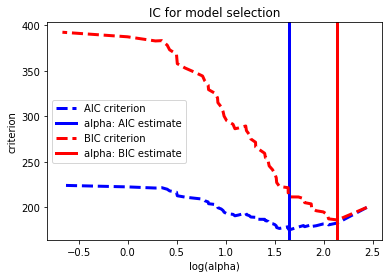

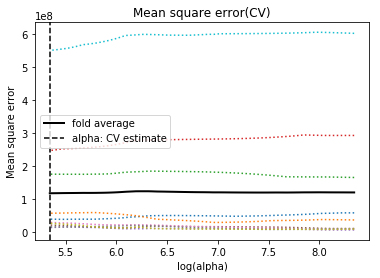

In [10]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LassoCV, LassoLarsIC

# LassoLarsIC: least angle regression with BIC/AIC criterion

model_bic = LassoLarsIC(criterion='bic')
model_bic.fit(newsX, newsY)
alpha_bic = model_bic.alpha_

model_aic = LassoLarsIC(criterion='aic')
model_aic.fit(newsX, newsY)
alpha_aic = model_aic.alpha_

#Plot code referenced from scikit-learn website
def plot_ic_criterion(model, name, color):
    alpha_ = model.alpha_
    alphas_ = model.alphas_
    criterion_ = model.criterion_
    plt.plot(np.log10(alphas_), criterion_, '--', color=color,
             linewidth=3, label='%s criterion' % name)
    plt.axvline(np.log10(alpha_), color=color, linewidth=3,
                label='alpha: %s estimate' % name)
    plt.xlabel('log(alpha)')
    plt.ylabel('criterion')

plt.figure()
plot_ic_criterion(model_aic, 'AIC', 'b')
plot_ic_criterion(model_bic, 'BIC', 'r')
plt.legend()
plt.title('IC for model selection')


model = LassoCV(cv=10).fit(newsX, newsY)

# Display results
m_log_alphas = np.log10(model.alphas_)

plt.figure()
plt.plot(m_log_alphas, model.mse_path_, ':')
plt.plot(m_log_alphas, model.mse_path_.mean(axis=-1), 'k',
         label='fold average', linewidth=2)
plt.axvline(np.log10(model.alpha_), linestyle='--', color='k',
            label='alpha: CV estimate')

plt.legend()

plt.xlabel('log(alpha)')
plt.ylabel('Mean square error')
plt.title('Mean square error(CV)')
plt.axis('tight')

plt.show()




The above graphs represent the two methods to find optimal penalty parameter alpha in each of the folds. The first graph shows how log(alpha) changes using the two information criterion - AIC and BIC. We see as log alpha increases the value decreases. The optimal value for alpha for AIC is lesser than that of BIC, which ties with our explanation that the penalty should increase for BIC when the number of variables increases more than 8.

In the second graph , we calculate the mean squared error across different folds. The coloured dotter line represent the MSE across each fold, and the solid black line represents the average MSE across all the folds. The dotted black line represents the optimal value of log alpha by cross validation.

<b>Note</b> Information-criterion based model selection is very fast, but it relies on a proper estimation of degrees of freedom. They also tend to break when number of features are more than the sample size.

#### 4) Tree-based feature selection

Feature selection can also be applied when we are working with Classification tree and Random Forests. When these models are coupled with SelectFromModel() method, they can help us reduce the number of variables in a tree model.

To illustrate in example, we will create a small classification data set similar to our news dataset. Because our dataset was a regression problem, it cannot be used in this problem. We use make_classification() function of sklearn library. We will assume are dataset of 500 items, with 20 predictors and approximately 5 variables as important variables. We are forming a forest using ensemble of 250 fees 

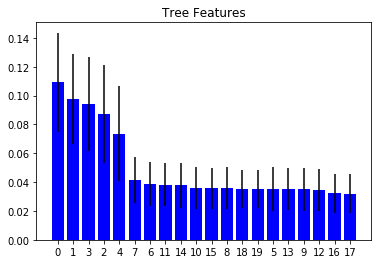

In [11]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

X, y = make_classification(n_samples=500,
                           n_features=20,
                           n_informative=5,
                           n_redundant=0,
                           n_repeated=0,
                           n_classes=2,
                           shuffle=False)

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Plot the feature importances of the forest
plt.figure()
plt.title("Tree Features")
plt.bar(range(X.shape[1]), importances[indices],
       color="b", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.show()

We can see that the 5 variables are marked significantly higher than the trest of the variables. So we can say that the variable 0-4 are more significant than the other variables in our model. The black bars on the bar chart represent the confidence interval of each of the bars. We can use this on any of the classification tree and random forest to find out important features to be chosen for the model.

### Limitations

<ul>
<li>Most of the methods do work in most of the cases, but we have to be careful about the number of records to and the number of features. Models might not be able to train well enough if we have very few records. Few of these stepwise variable selection models also require that the number of rows should be more than the number of predictors else the model is not trained well enough to differentiate between predictive powers of the features.

<li>You also have to be careful about classification/regression models. While most of the models do have variations of the methods to be applied for both kind of machine learning problems, the syntax and the calls might differ.

<li>There might be some pre processing required before we could feed the data into these modls, Some of the model might need the categorical variables (eg season, months) to be converted into their numerical levels.

### Conclusions

Feature selection is becoming an important part of implemnting machine learning algorithm. With increasing number of predictors we must restrict our model to only relevant and high predicting variables. The step before model selection is identifying what problem you are dealing with , regression or classification as we have methods avaible for models pertaining to both the tasks. You also need to decide the statstical parameter you need to gauge your model on. For regression tasks you will have options like MSE, RSS , Rsquared and for classification you could choose between accuracy, sensitivity , ROC and false positive rates etc.

You would see that the best fit models (ie model with right number of variables) will always have better predictive power and better accuracy than large uncontained models. This is because the predictive pwoer is not spread across corelated variables so you get the true representation of your model.

### References

<ul>
<li> Wikipedia: www.wikipedia.org
<li> Scikit-Learn : www.scikit-learn.org
<li> Stack Exchange : www.stats.stackexchange.com
<li> Reddit: www.reddit.com/r/statistics
<li> Machine Learning Mastery : www.machinelearningmastery.com
<li> Stack Overflow : www.stackoverflow.com
<li> Alexandra Chouldechova - Data Mining - Carnegie Mellon University